<a href="https://colab.research.google.com/github/Srikanth-shivalingu/Srikanth-shivalingu/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Spark Fountation- Data science and Business analytics internship**

**Task 1 - Prediction using Supervised ML**

**Task By : Shivalingu Srikanth**



In [1]:
#importing all requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings as wg
wg.filterwarnings("ignore")


In [2]:
#Reading data from the source link

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
# observe the dataset

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# TO find no of cloumns and rows
df.shape

(25, 2)

In [6]:
# TO find more information about given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#to check if given dataset is having missing or null values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

AS we can see we do not have any null values in our data set so we can now move on to our next step

# **# STEP 2 - visualizing the dataset**


In this we will plot the dataset to check whether we can observe any relation between the two variables or not

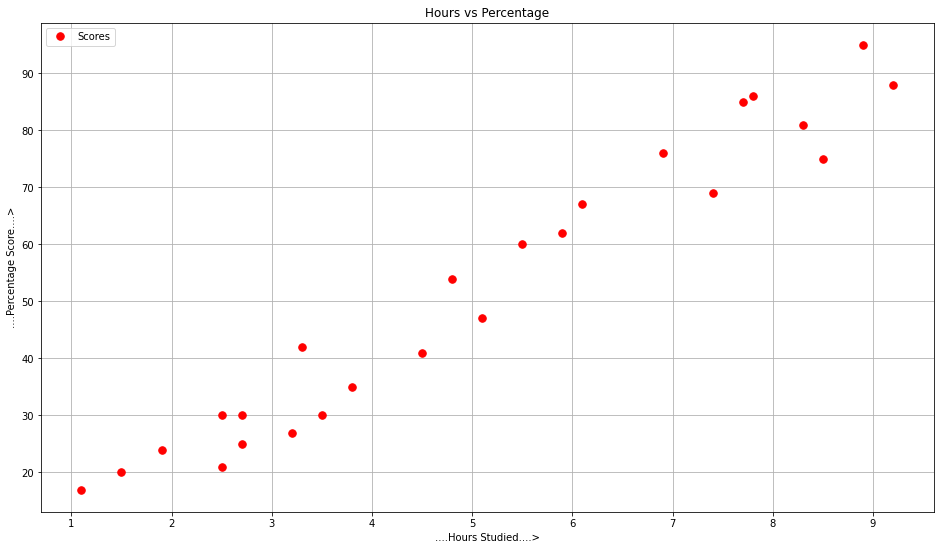

In [38]:
# plotting datasets

plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours', y='Scores',style='.',color='red',markersize=15)
plt.title('Hours vs Percentage')
plt.xlabel('....Hours Studied....>')
plt.ylabel('....Percentage Score....>')
plt.grid()
plt.show()


**From the above graph , we can observe that there is linear relationship between "hours studied" and "percentage scored".so, we can use the linear regression supervised ML model on it to predicted values.**

In [21]:
# to dtermine correlation between variables we can  use  .corr()

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **STEP 3 - Data preparation**
 in this section we will divide the data into "features"(input) and labels(output).After that we will spilt dataset into testing and training data



In [23]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
#using iloc function we will divide the dataset

x = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

In [25]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [26]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

# **STEP 4 - Training Algorithm**

In [27]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# **STEP 5 - Visualizing the model**
after training the model ,now its time to visualize it.

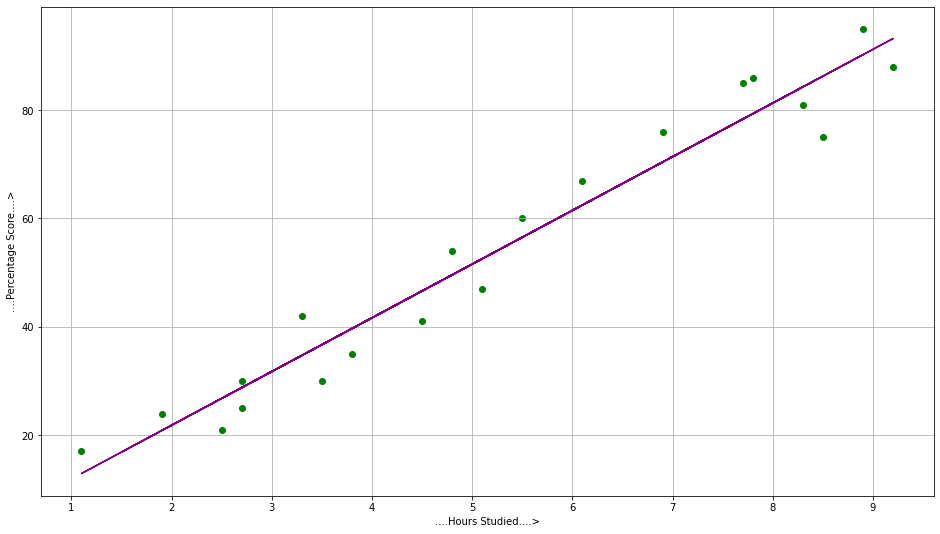

In [42]:
line = model.coef_*x + model.intercept_

plt.rcParams["figure.figsize"] =[16,9]
plt.scatter(x_train, y_train, color='green')
plt.plot(x,line, color='purple');
plt.xlabel('....Hours Studied....>')
plt.ylabel('....Percentage Score....>')
plt.grid()
plt.show()

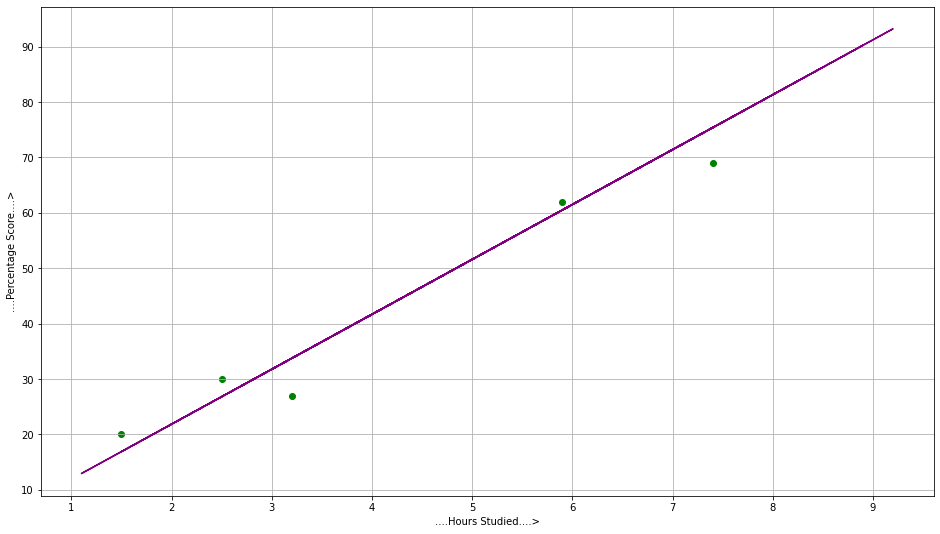

In [41]:
plt.rcParams["figure.figsize"] =[16,9]
plt.scatter(x_test, y_test, color='green')
plt.plot(x,line, color='purple');
plt.xlabel('....Hours Studied....>')
plt.ylabel('....Percentage Score....>')
plt.grid()
plt.show()

# **STEP 6 - Making prediction**
we trained the algorithm ,now its time to make predictins

In [30]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [31]:
# compare actual vs predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [32]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [34]:
# compare actual vs predicted

comp = pd.DataFrame({'Actual':[y_test],'predicted':[y_pred]})
comp

,Actual,predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [36]:
# tesing our own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


**The predicted score if a person studied for 9.25 hours is [93.69173249]**

## **Evaluating the model**
we are going to evaluate our model by calculating mean absolute error

In [37]:
from sklearn import metrics
print('mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

mean Absolute Error: 4.183859899002982
